# Practical Lab 3
# Waseem Raja Shaik
# 8894805

**Lab 3**

This lab provides insight into the concepts of Supervised Learning -Regression algorithms.

**Part A:**

Problem Statement: Consider the dataset Credit Card Fraud Detection from Kaggle and build a machine-learning model that detects whether a credit card transaction is fraudulent. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using the logistic regression to build the model, and evaluate to determine the accuracy.
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score

# kept creditcard csv in practical labs folder but didn't pushed it
creditcard = pd.read_csv('../../practical_labs/creditcard.csv')

In [30]:
# Explore the dataset
display(creditcard.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [31]:
# From above it's clear that no categorical variables
display(creditcard.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

None

In [32]:
# note from above no null values
display(creditcard.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data Cleaning

In [33]:
# Checking Duplicate rows
print("Number of duplicate rows:", creditcard.duplicated().sum())

Number of duplicate rows: 1081


In [34]:
# Remove duplicate rows
creditcard.drop_duplicates(inplace=True)

# Reset the index after removing duplicates
creditcard.reset_index(drop=True, inplace=True)

In [35]:
print("Number of duplicate rows:", creditcard.duplicated().sum())

Number of duplicate rows: 0


### Based on the Credit Card Fraud Detection Description
Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise

In [36]:
print('Number of normal transaction',len(creditcard[creditcard.Class == 0]))
print('Number of fraud transaction',len(creditcard[creditcard.Class == 1]))

Number of normal transaction 283253
Number of fraud transaction 473


In [37]:
# Standardize the 'Amount' column for better model fit and visualization
scaler = StandardScaler()
creditcard['Amount'] = scaler.fit_transform(creditcard['Amount'].values.reshape(-1, 1))
display(creditcard)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
283722,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
283723,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
283724,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


In [38]:
# Can drop Time because we don't need it for this problem.
creditcard = creditcard.drop('Time', axis=1)
display(creditcard)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
283722,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
283723,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
283724,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


In [39]:
X = creditcard.drop('Class',axis=1)
y = creditcard['Class']
display(X)
display(y)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252
283722,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325
283723,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239
283724,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391


0         0
1         0
2         0
3         0
4         0
         ..
283721    0
283722    0
283723    0
283724    0
283725    0
Name: Class, Length: 283726, dtype: int64

## Model Training and Evaluation (Logistic Regression)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
display(X_train)
display(y_train)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
9261,1.062798,-0.007554,1.169893,1.694109,-0.559090,0.527767,-0.608457,0.254902,1.958445,-0.442814,...,-0.269189,-0.175983,0.050427,-0.040761,0.185224,0.516446,-0.325208,0.039374,0.007193,-0.317384
76107,0.847556,-0.338382,-0.191249,0.644180,-0.183540,-0.714065,0.632148,-0.252654,-0.251573,-0.201071,...,0.294179,-0.230173,-1.113621,-0.005678,0.078580,0.146345,0.145774,-0.084227,0.041947,0.484736
240188,0.128523,-0.516833,-0.142250,-0.928846,0.527405,-0.707555,0.005645,-0.057433,-1.121318,0.510696,...,-0.373181,0.107889,0.729755,-0.064491,-0.465817,-0.107939,-0.024985,0.029513,-0.020921,-0.240387
51280,-0.681253,-3.310937,-0.269365,1.180375,-0.761417,2.582536,0.234441,0.505835,1.011396,-0.922163,...,1.601252,0.395436,-0.489844,-0.710257,-1.720611,-0.280947,0.460254,-0.090716,0.156289,3.266176
30734,1.268610,0.069977,0.331383,0.725081,-0.315020,-0.434386,-0.032536,-0.105304,0.499264,-0.192168,...,-0.106359,-0.265292,-0.576113,-0.048183,-0.082980,0.520402,0.300388,-0.022789,0.007630,-0.329485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,-0.188193,-3.244306,-1.083455,0.136170,-1.626809,-0.517792,0.786109,-0.401554,-0.642671,0.274674,...,1.137602,0.011795,-1.341362,-0.791988,-0.064471,0.141139,1.038062,-0.238098,0.136452,3.038859
259178,0.149260,0.988698,-0.605170,-0.788264,1.238822,-0.203064,0.861209,0.067349,-0.279204,-0.664895,...,0.045101,-0.326673,-0.816542,0.008957,-0.010456,-0.377837,0.128193,0.219217,0.068558,-0.349773
131932,1.259310,-0.049484,-0.721776,0.071903,1.864771,3.635628,-0.821682,0.929256,0.128685,0.094031,...,-0.003257,0.070189,0.104264,-0.107993,1.004823,0.674600,-0.275199,0.045933,0.025074,-0.335356
146867,1.982903,-0.134427,-1.161183,0.472515,-0.043755,-1.080473,0.306983,-0.373167,0.454594,0.008851,...,-0.110161,-0.212230,-0.472417,0.248672,0.025584,-0.195097,0.272711,-0.071660,-0.055715,-0.195658


9261      0
76107     0
240188    0
51280     0
30734     0
         ..
119879    0
259178    0
131932    0
146867    0
121958    0
Name: Class, Length: 198608, dtype: int64

In [42]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [43]:
y_pred = model.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9991541154632393
Confusion Matrix:
[[84972    12]
 [   60    74]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.86      0.55      0.67       134

    accuracy                           1.00     85118
   macro avg       0.93      0.78      0.84     85118
weighted avg       1.00      1.00      1.00     85118



- The accuracy of the model is very high (99.92%), which might initially seem impressive. However, accuracy alone may not be sufficient for evaluating the performance of a model, especially for imbalanced datasets like credit card fraud detection. In this case, the number of non-fraudulent transactions (class 0) is significantly higher than fraudulent ones (class 1).

- The model's precision is good at 86%. Precision represents the proportion of true positive predictions (correctly classified frauds) out of all the positive predictions (both correct and incorrect). So, when the model predicts a transaction as fraudulent, it is correct about 86% of the time.

- The recall, also known as sensitivity or true positive rate, is relatively low at 55%. Recall measures the proportion of actual positive instances (fraudulent transactions) that the model correctly identifies. A recall of 55% suggests that the model missed a considerable number of fraudulent transactions, indicating room for improvement in detecting more fraudulent cases.

- The F1-score is a harmonic mean of precision and recall, providing a more balanced measure of the model's performance on class 1 (fraudulent transactions). It is calculated as 0.67, indicating a reasonable balance between precision and recall for detecting fraudulent transactions.

- Looking at the confusion matrix, it becomes clear that the model made some errors. Specifically, it classified 60 fraudulent transactions as non-fraudulent (false negatives), and 12 non-fraudulent transactions as fraudulent (false positives).


**Part B:**

Problem Statement: Use the following insurance dataset and build a predictive system to predict insurance costs. Demonstrate the steps of data preprocessing and analysis, consider applying train (0.7) and test (0.3), using linear regression to build the model, and evaluate the accuracy of predicting the insurance cost.
https://www.kaggle.com/datasets/mirichoi0218/insurance 


In [45]:
# kept creditcard csv in practical labs folder but didn't pushed it
insurance = pd.read_csv('../../practical_labs/insurance.csv')

In [46]:
# Explore the dataset
display(insurance.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
# From above it's clear that categorical variables are there
display(insurance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

In [48]:
# No null values as shown above
categorical_columns = ['sex', 'smoker', 'region']
# Now changing catergorical variables into numeric variables
label_encoder = LabelEncoder()
for cat_col in categorical_columns:
    insurance[cat_col] = label_encoder.fit_transform(insurance[cat_col])

display(insurance)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [49]:
print("Number of duplicate rows:", insurance.duplicated().sum())

# Remove duplicate rows
insurance.drop_duplicates(inplace=True)

# Reset the index after removing duplicates
insurance.reset_index(drop=True, inplace=True)

Number of duplicate rows: 1


In [50]:
print("Number of duplicate rows:", insurance.duplicated().sum())

Number of duplicate rows: 0


In [51]:
X = insurance.drop('charges', axis=1)
y = insurance['charges']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Training and Evaluation (Linear Regression)

In [53]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred = model.predict(X_test)

In [55]:
# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred)}")
print(f"R-squared (R2) Score: {r2_score(y_test, y_pred)}")


Mean Squared Error (MSE): 38935221.01064076
Root Mean Squared Error (RMSE): 6239.809372940872
Mean Absolute Error (MAE): 4182.803777070157
R-squared (R2) Score: 0.7724652729621758


- MSE: The MSE measures the average squared difference between predicted and actual insurance costs, indicating how close the model's predictions are to the true values.

- RMSE: The RMSE is the square root of MSE, providing an interpretable metric in the same unit as the target variable. Here, the RMSE is about $6239.81, representing the average prediction error in insurance costs.

- MAE: The MAE measures the average absolute difference between predicted and actual insurance costs. The MAE is approximately $4182.80, indicating the average absolute prediction error.

- R2 Score: The R-squared score of approximately 0.77 suggests that around 77% of the variance in insurance costs is explained by the model, indicating moderate predictive capability.

Overall, the model demonstrates some predictive power with an R-squared score of 0.77. 

### Graphical Representation.

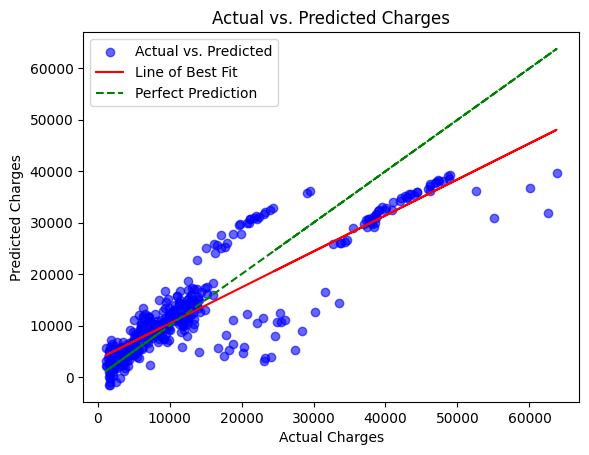

In [56]:
plt.scatter(y_test, y_pred, alpha=0.6, color='b', label='Actual vs. Predicted')
fit_line = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(fit_line, y_test), color='r', label='Line of Best Fit')
plt.plot(y_test, y_test, color='g', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs. Predicted Charges")
plt.legend()
plt.show()


**Notes:**

This lab should be submitted as a notebook and an HTML. Follow https://docs.github.com/en/pages/quickstart.